<a href="https://colab.research.google.com/github/hildahelin/Aerodynamics-Equations-in-Python/blob/main/EquationsofAerodynamics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

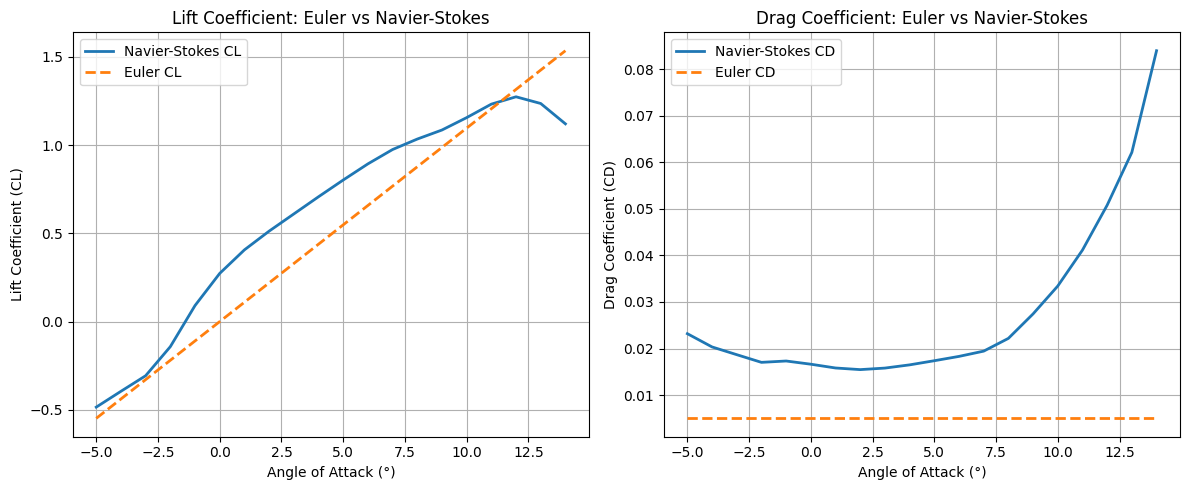

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def euler_CL_CD_from_formula(alphas_deg):
    alphas_rad = np.radians(alphas_deg)
    CL_array = 2 * np.pi * alphas_rad  # CL = 2π·α (α in radians)
    CD_array = np.full_like(CL_array, 0.005)  # Assumed constant small drag in Euler
    return CL_array, CD_array



def read_polar(filename):
    alphas, CLs, CDs = [], [], []
    with open(filename, 'r') as f:
        start = False
        for line in f:
            line = line.strip()
            if line.lower().startswith('alpha'):
                start = True
                continue
            if start:
                if line == '' or '------' in line:
                    continue
                parts = line.split()
                if len(parts) >= 3:
                    try:
                        alphas.append(float(parts[0]))
                        CLs.append(float(parts[1]))
                        CDs.append(float(parts[2]))
                    except:
                        continue
    return np.array(alphas), np.array(CLs), np.array(CDs)


def plot_results(alphas, CLs_navier, CDs_navier, CLs_euler, CDs_euler):
    plt.figure(figsize=(12, 5))

    # CL vs AoA
    plt.subplot(1, 2, 1)
    plt.plot(alphas, CLs_navier, label="Navier-Stokes CL", linewidth=2)
    plt.plot(alphas, CLs_euler, '--', label="Euler CL", linewidth=2)
    plt.xlabel("Angle of Attack (°)")
    plt.ylabel("Lift Coefficient (CL)")
    plt.title("Lift Coefficient: Euler vs Navier-Stokes")
    plt.legend()
    plt.grid(True)

    # CD vs AoA
    plt.subplot(1, 2, 2)
    plt.plot(alphas, CDs_navier, label="Navier-Stokes CD", linewidth=2)
    plt.plot(alphas, CDs_euler, '--', label="Euler CD", linewidth=2)
    plt.xlabel("Angle of Attack (°)")
    plt.ylabel("Drag Coefficient (CD)")
    plt.title("Drag Coefficient: Euler vs Navier-Stokes")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()


if __name__ == "__main__":
    filename = "naca2412polar_navier.txt"
    alphas, CLs_navier, CDs_navier = read_polar(filename)

    CLs_euler, CDs_euler = euler_CL_CD_from_formula(alphas)

    plot_results(alphas, CLs_navier, CDs_navier, CLs_euler, CDs_euler)
